In [2]:
#Importing the dataset

import pandas as pd
import numpy as np
import seaborn as sns 

missing_values = ["n/a","na","-",""]
data_results = pd.read_csv(r'/Users/altairirfan/Desktop/premier-league/results.csv', na_values=missing_values)
data_stats = pd.read_csv(r'/Users/altairirfan/Desktop/premier-league/stats.csv', na_values=missing_values)

In [3]:
data_stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [4]:
data_results.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [5]:
#check all missing data in the dataset (results)
print (data_results.isnull().sum())

home_team     0
away_team     0
home_goals    0
away_goals    0
result        0
season        0
dtype: int64


In [6]:
#if you want to know any missing values
print (data_results.isnull().values.any())

False


In [7]:
#check all missing data in the dataset(stats)
print (data_stats.isnull().sum())

team                     0
wins                     0
losses                   0
goals                    0
total_yel_card           0
total_red_card           0
total_scoring_att        0
ontarget_scoring_att     0
hit_woodwork             0
att_hd_goal              0
att_pen_goal             0
att_freekick_goal        0
att_ibox_goal            0
att_obox_goal            0
goal_fastbreak           0
total_offside            0
clean_sheet              0
goals_conceded           0
saves                   20
outfielder_block         0
interception             0
total_tackle             0
last_man_tackle          0
total_clearance          0
head_clearance          20
own_goals                0
penalty_conceded         0
pen_goals_conceded       0
total_pass               0
total_through_ball      20
total_long_balls         0
backward_pass           80
total_cross              0
corner_taken             0
touches                  0
big_chance_missed       80
clearance_off_line       0
d

In [8]:
#if you want to know any missing values
print (data_results.isnull().values.any())

False


In [9]:
# Fill NaN with the mean of the column
data_stats['saves'] = data_stats['saves'].fillna(data_stats['saves'].mean())
data_stats['head_clearance'] = data_stats['head_clearance'].fillna(data_stats['head_clearance'].mean())
data_stats['total_through_ball'] = data_stats['total_through_ball'].fillna(data_stats['total_through_ball'].mean())
data_stats['backward_pass'] = data_stats['backward_pass'].fillna(data_stats['backward_pass'].mean())
data_stats['dispossessed'] = data_stats['dispossessed'].fillna(data_stats['dispossessed'].mean())
data_stats['big_chance_missed'] = data_stats['big_chance_missed'].fillna(data_stats['big_chance_missed'].mean())

In [10]:
#check all missing data in the dataset(stats)
print (data_stats.isnull().sum())

team                    0
wins                    0
losses                  0
goals                   0
total_yel_card          0
total_red_card          0
total_scoring_att       0
ontarget_scoring_att    0
hit_woodwork            0
att_hd_goal             0
att_pen_goal            0
att_freekick_goal       0
att_ibox_goal           0
att_obox_goal           0
goal_fastbreak          0
total_offside           0
clean_sheet             0
goals_conceded          0
saves                   0
outfielder_block        0
interception            0
total_tackle            0
last_man_tackle         0
total_clearance         0
head_clearance          0
own_goals               0
penalty_conceded        0
pen_goals_conceded      0
total_pass              0
total_through_ball      0
total_long_balls        0
backward_pass           0
total_cross             0
corner_taken            0
touches                 0
big_chance_missed       0
clearance_off_line      0
dispossessed            0
penalty_save

In [11]:
#if you want to know any missing values
print (data_stats.isnull().values.any())

False


In [12]:
data_results.corr()

,home_goals,away_goals
home_goals,1.000000,-0.070151
away_goals,-0.070151,1.000000


In [13]:
#General Overview of Wins and Losses for Manchester United from seasons 2006-07 to 2017-18

# A. Extracting data that is valid only for Manchester United and Manchester City respectively

data_united = data_stats[data_stats.team=='Manchester United']
data_city = data_stats[data_stats.team=='Manchester City']

In [15]:
#B. Slicing the original DataFrame into two for each team.

#One for Wins v Season for each team

features_wins_united = ['wins','season'] 
data_winsVseason_united = data_united[features_wins_united] #Extracting out wins for every season for Manchester United

In [16]:
features_wins_city = ['wins','season'] 
data_winsVseason_city = data_city[features_wins_city] #Extracting out wins for every season for Manchester City

In [17]:
#And another for Losses v Season for each team

features_loss_united= ['losses','season']
data_lossVseason_united = data_united[features_loss_united] #Extracting out losses for every season for Manchester United.

In [18]:
features_loss_city= ['losses','season']
data_lossVseason_city = data_city[features_loss_city] #Extracting out losses for every season for Manchester city.

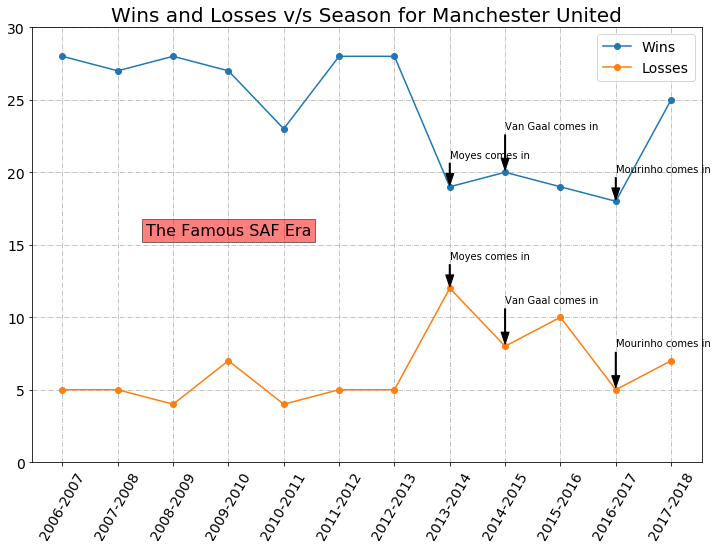

In [19]:
#C. Creating the Matplotlib plot.

import matplotlib.pyplot as plt

#Plotting Wins and Losses v/s Season for Manchester United
plt.rcParams['figure.figsize'] = [12, 8] 
plt.plot(data_winsVseason_united.season, data_winsVseason_united.wins, label = 'Wins', marker='o') 
plt.plot(data_lossVseason_united.season, data_lossVseason_united.losses, label = 'Losses', marker='o') 
plt.ylim(0,30) #for setting y limits from 15 to 30.
plt.grid(which='major', axis='both', linestyle='-.', linewidth=0.75) 
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14) 
plt.title('Wins and Losses v/s Season for Manchester United', fontsize = 20)

try: 
    
    plt.annotate('Moyes comes in', xy=('2013-2014',19), xytext=('2013-2014', 21),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For the wins curve. The label is Moyes comes in.
     
    
    plt.annotate('Moyes comes in', xy=('2013-2014',12), xytext=('2013-2014', 14),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For losses curve. The label is Moyes comes in.
    
    plt.annotate('Van Gaal comes in', xy=('2014-2015',20), xytext=('2014-2015', 23),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For wins curve when LVG comes in.
    
    plt.annotate('Van Gaal comes in', xy=('2014-2015',8), xytext=('2014-2015', 11),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10)
    #For losses curve when LVG comes in.
    
    plt.annotate('Mourinho comes in', xy=('2016-2017',18), xytext=('2016-2017', 20),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For wins curve when Mou comes in. 
    
    plt.annotate('Mourinho comes in', xy=('2016-2017',5), xytext=('2016-2017', 8),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For losses curve when Mou comes in. 
    
    plt.text('2009-2010',16,'The Famous SAF Era', horizontalalignment='center', verticalalignment='center', fontsize =16, bbox=dict(facecolor='red', alpha=0.5)) 
    #For the middle big text
    
    
except TypeError: 
    pass

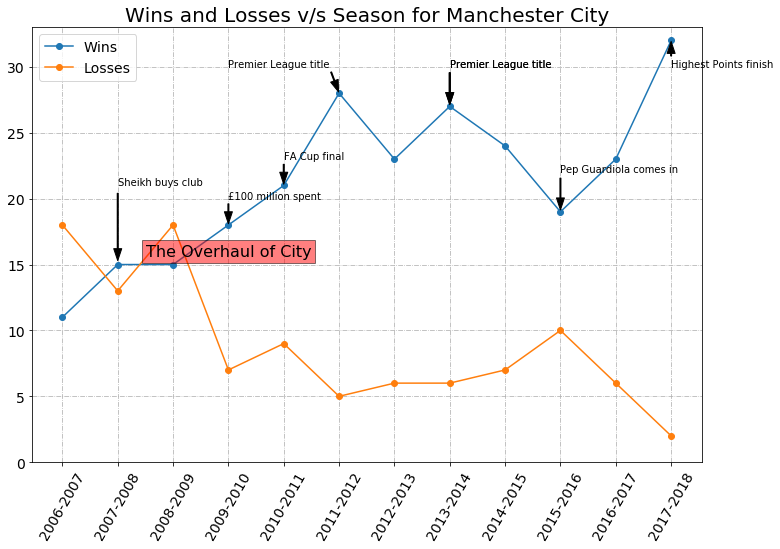

In [20]:
#Plotting Wins and Losses v/s Season for Manchester City
plt.rcParams['figure.figsize'] = [12, 8] 
plt.plot(data_winsVseason_city.season, data_winsVseason_city.wins, label = 'Wins', marker='o') 
plt.plot(data_lossVseason_city.season, data_lossVseason_city.losses, label = 'Losses', marker='o')
plt.ylim(0,33) 
plt.grid(which='major', axis='both', linestyle='-.', linewidth=0.75) 
plt.xticks(rotation=60, fontsize=14) 
plt.yticks(fontsize=14) 
plt.legend(fontsize=14) 
plt.title('Wins and Losses v/s Season for Manchester City', fontsize = 20)

try: #try catch is used because here x-coord is a string like 2006-2007 and hence gives a TypeError. So TypeError errors are overlooked in except statement.
    
    plt.annotate('Sheikh buys club', xy=('2007-2008',15), xytext=('2007-2008', 21),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For the point when Arab investment came in
    #xy is the position of marker point. xytext is position of label text. 
    
    plt.annotate('FA Cup final', xy=('2010-2011',21), xytext=('2010-2011', 23),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For winning FA Cup final
    
    plt.annotate('£100 million spent', xy=('2009-2010',18), xytext=('2009-2010', 20),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For when city spent 100 million 
    
    plt.annotate('Premier League title', xy=('2011-2012',28), xytext=('2009-2010', 30 ),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For PL title
    
    plt.annotate('Premier League title', xy=('2013-2014',27), xytext=('2013-2014', 30 ),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For PL title
    
    plt.annotate('Premier League title', xy=('2013-2014',27), xytext=('2013-2014', 30 ),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For PL title 
    
    plt.annotate('Pep Guardiola comes in', xy=('2015-2016',19), xytext=('2015-2016', 22 ),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For winning curve when Guardiola comes in. 
    
    plt.text('2009-2010',16,'The Overhaul of City', horizontalalignment='center', verticalalignment='center', fontsize =16, bbox=dict(facecolor='red', alpha=0.5)) 
    #For the middle big text
    
    plt.annotate('Highest Points finish', xy=('2017-2018',32), xytext=('2017-2018', 30 ),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For highest point finish under Guandiola 
    
    
    
except TypeError: 
    pass

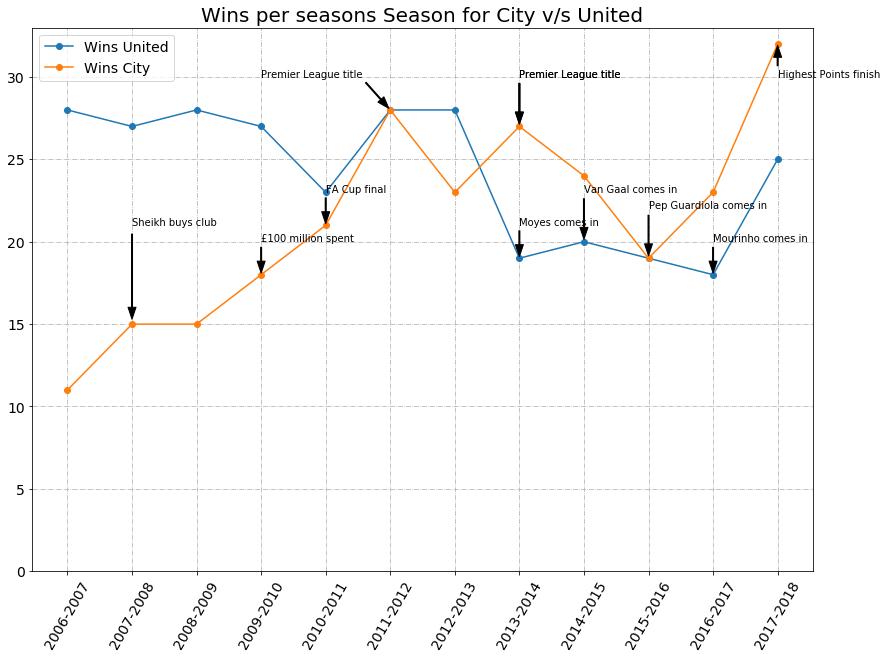

In [21]:
#C. Creating the Matplotlib plot.

import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [14, 10] 
plt.plot(data_winsVseason_united.season, data_winsVseason_united.wins, label = 'Wins United', marker='o') 
plt.ylim(0,30) 
plt.grid(which='major', axis='both', linestyle='-.', linewidth=0.75) 
plt.xticks(rotation=60, fontsize=14) 
plt.yticks(fontsize=14) 
plt.legend(fontsize=14) 

plt.rcParams['figure.figsize'] = [12, 8] 
plt.plot(data_winsVseason_city.season, data_winsVseason_city.wins, label = 'Wins City', marker='o') 
plt.ylim(0,33) #for setting y limits from 15 to 30.
plt.grid(which='major', axis='both', linestyle='-.', linewidth=0.75) 
plt.xticks(rotation=60, fontsize=14) 
plt.yticks(fontsize=14) 
plt.legend(fontsize=14) 
plt.title('Wins per seasons Season for City v/s United', fontsize = 20)

try: 
    
    plt.annotate('Moyes comes in', xy=('2013-2014',19), xytext=('2013-2014', 21),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For the wins curve. The label is Moyes comes in.
    #xy is the position of marker point. xytext is position of label text. 
    
    plt.annotate('Van Gaal comes in', xy=('2014-2015',20), xytext=('2014-2015', 23),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For wins curve when LVG comes in.
    
    plt.annotate('Mourinho comes in', xy=('2016-2017',18), xytext=('2016-2017', 20),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For wins curve when Mou comes in. 
    
    plt.annotate('Sheikh buys club', xy=('2007-2008',15), xytext=('2007-2008', 21),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For the point when Arab investment came in
    #xy is the position of marker point. xytext is position of label text. 
    
    plt.annotate('FA Cup final', xy=('2010-2011',21), xytext=('2010-2011', 23),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For winning FA Cup final
    
    plt.annotate('£100 million spent', xy=('2009-2010',18), xytext=('2009-2010', 20),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For when city spent 100 million 
    
    plt.annotate('Premier League title', xy=('2011-2012',28), xytext=('2009-2010', 30 ),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For PL title
    
    plt.annotate('Premier League title', xy=('2013-2014',27), xytext=('2013-2014', 30 ),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For PL title
    
    plt.annotate('Premier League title', xy=('2013-2014',27), xytext=('2013-2014', 30 ),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For PL title 
    
    plt.annotate('Pep Guardiola comes in', xy=('2015-2016',19), xytext=('2015-2016', 22 ),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For winning curve when Guardiola comes in. 
    
    
    plt.annotate('Highest Points finish', xy=('2017-2018',32), xytext=('2017-2018', 30 ),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =10) 
    #For highest point finish under Guandiola 
    
except TypeError: 
    pass

In [60]:
# converting the season to a single year 2017-2018 season is represented as 2017 season

arr = list(data_results['season'])
season = list()
for val in arr:
    temp = val.split('-')[0]
    season.append(temp)
season

season = pd.to_datetime(season)
season.year
data_results['season'] = season.year

data_results['season'] = data_results['season'].astype(int)
data_results.head(5)

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006
1,Arsenal,Aston Villa,1.0,1.0,D,2006
2,Everton,Watford,2.0,1.0,H,2006
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006


In [61]:
#Converting the from float to int
data_results['home_goals'] = data_results['home_goals'].astype(int)
data_results['away_goals'] = data_results['away_goals'].astype(int)
data_results.head(5)

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1,1,D,2006
1,Arsenal,Aston Villa,1,1,D,2006
2,Everton,Watford,2,1,H,2006
3,Newcastle United,Wigan Athletic,2,1,H,2006
4,Portsmouth,Blackburn Rovers,3,0,H,2006


In [62]:
def goals(season):
    a=data_results[(data_results.season==season)&(data_results.home_team=='Manchester United')]['home_goals'].sum()
    b=data_results[(data_results.season==season)&(data_results.away_team=='Manchester United')]['away_goals'].sum()
    c=data_results[(data_results.season==season)&(data_results.home_team=='Manchester City')]['home_goals'].sum()
    d=data_results[(data_results.season==season)&(data_results.away_team=='Manchester City')]['away_goals'].sum()
    index=['MANCHESTER UNITED','MANCHESTER CITY']
    m1=[a,c]
    m2=[b,d]
    print ("Goals scored season:",season)
    df = pd.DataFrame({'Home Goals':m1,'Away Goals':m2}, index=index)
    ax = df.plot.bar(rot=0)

Goals scored season: 2015


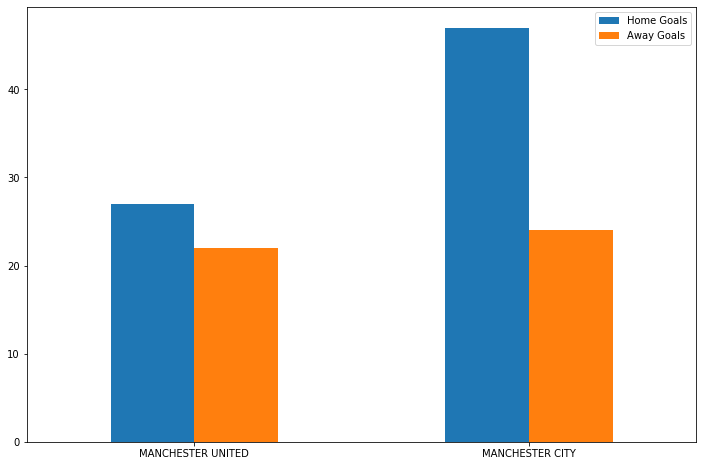

In [63]:
goals(2015)

Goals scored season: 2016


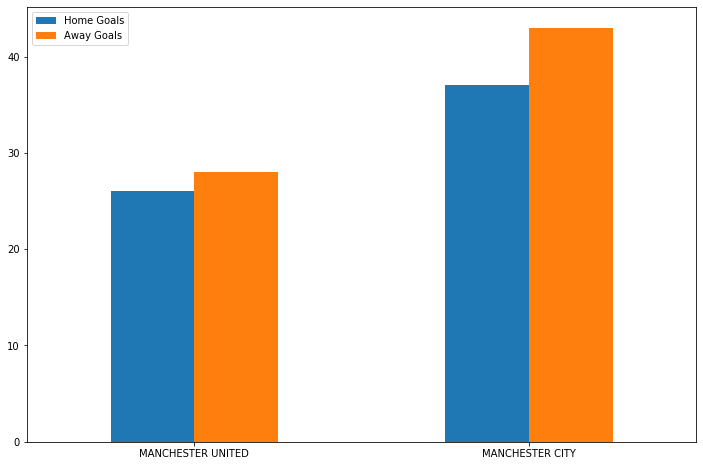

In [64]:
goals(2016)

Goals scored season: 2017


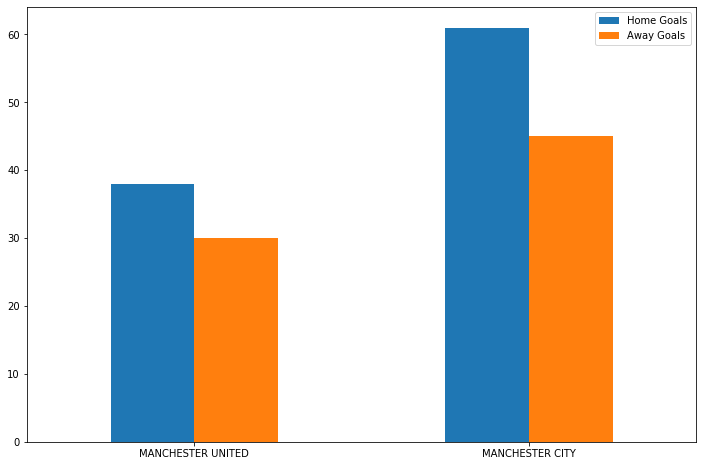

In [65]:
goals(2017)

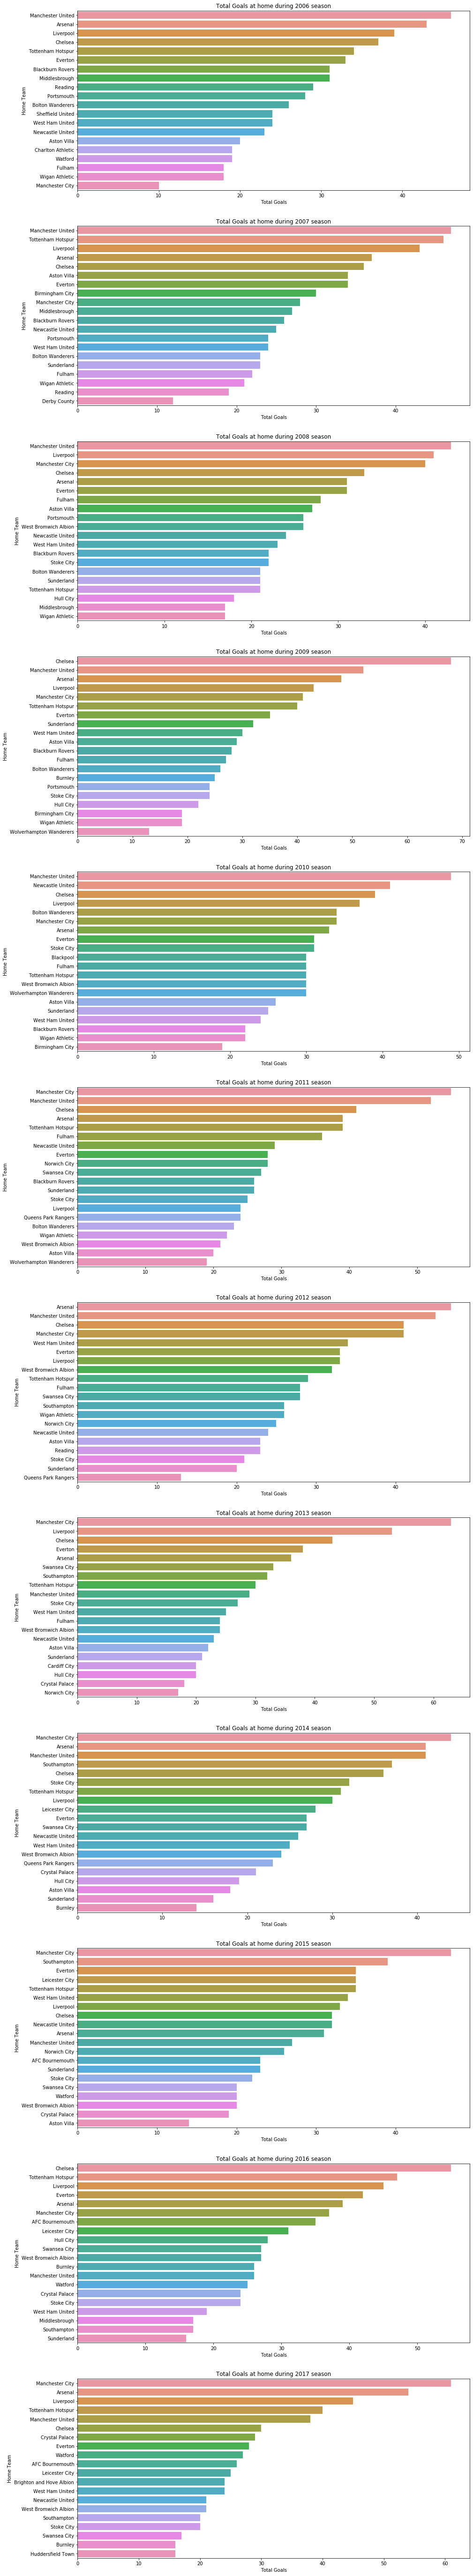

In [66]:
data_results_goals_hometeam =data_results.loc[:,['home_team','home_goals','season']].groupby(['season','home_team']).sum().\
reset_index().sort_values(by=['season','home_goals'],ascending=[1,0])
data_results_result = pd.get_dummies(data_results.loc[:,['result']]).iloc[:,[0,2]]

data_results_plt = \
data_results.loc[:,['home_team','result','season','home_goals']].groupby(['home_team','result','season']).count().reset_index()

season_lsts = data_results_plt.season.value_counts().index.tolist()
season_lsts.sort()
season_lsts
temp = data_results.select_dtypes(include=['int64']).loc[:,'home_goals'].value_counts().reset_index() 
temp1 = data_results.select_dtypes(include=['int64']).loc[:,'away_goals'].value_counts().reset_index()



fig, ax3 = plt.subplots(len(season_lsts),1)
fig.set_size_inches(15,100)
for i in range(len(season_lsts)):
    sns.barplot(data = data_results_goals_hometeam.loc[data_results_goals_hometeam.season == season_lsts[i],:],\
                x='home_goals',y='home_team',ax=ax3[i])
    ax3[i].set_title('Total Goals at home during {} season'.format(season_lsts[i]))
    ax3[i].set_xlabel("Total Goals")
    ax3[i].set_ylabel("Home Team")